

# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [47]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'train2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=11.66s)
creating index...
index created!
loading annotations into memory...
Done (t=1.72s)
creating index...
index created!


#### 1 image_id maps to 5 caption ids, when we locate a caption id, there should another similiar captions corresponding to the same image_id

In [56]:
len(ids_cap)

414113

In [24]:
ids_cap = list(coco_caps.anns.keys())
coco_caps.anns[ids_cap[2]]['caption']

'A blue and white bathroom with butterfly themed wall tiles.'

In [60]:
coco_caps.anns[ids_cap[0]]

{'caption': 'A very clean and well decorated empty bathroom',
 'id': 48,
 'image_id': 318556}

In [57]:
len(ids)

604907

#### The instance contains the whole information of the COCO dataset, including object detection/semantic segmentation/image information(ex, id..)

In [59]:
coco.anns[ids[0]]

{'area': 54652.9556,
 'bbox': [116.95, 305.86, 285.3, 266.03],
 'category_id': 58,
 'id': 86,
 'image_id': 480023,
 'iscrowd': 0,
 'segmentation': [[312.29,
   562.89,
   402.25,
   511.49,
   400.96,
   425.38,
   398.39,
   372.69,
   388.11,
   332.85,
   318.71,
   325.14,
   295.58,
   305.86,
   269.88,
   314.86,
   258.31,
   337.99,
   217.19,
   321.29,
   182.49,
   343.13,
   141.37,
   348.27,
   132.37,
   358.55,
   159.36,
   377.83,
   116.95,
   421.53,
   167.07,
   499.92,
   232.61,
   560.32,
   300.72,
   571.89]]}

In [65]:
img = coco.loadImgs(480023)[0]

In [66]:
img

{'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000480023.jpg',
 'date_captured': '2013-11-20 12:06:29',
 'file_name': 'COCO_train2014_000000480023.jpg',
 'flickr_url': 'http://farm4.staticflickr.com/3145/2573294978_b535a7e795_z.jpg',
 'height': 640,
 'id': 480023,
 'license': 4,
 'width': 480}

In [69]:
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
anns

[{'caption': 'A hand holding a hot dog in a paper container covered in mustard and ketchup.',
  'id': 155183,
  'image_id': 480023},
 {'caption': 'A person holding a hot dog with yellow mustard and onions on it, at a sports stadium.',
  'id': 156509,
  'image_id': 480023},
 {'caption': 'A hand holds a traditional loaded ballgame hotdog.',
  'id': 159176,
  'image_id': 480023},
 {'caption': 'A person holding up a hot dog at a ball park.',
  'id': 179954,
  'image_id': 480023},
 {'caption': 'A close-up of a person holding hot dog to the camera.',
  'id': 188240,
  'image_id': 480023}]

In [72]:
coco_caps.anns[155183]

{'caption': 'A hand holding a hot dog in a paper container covered in mustard and ketchup.',
 'id': 155183,
 'image_id': 480023}

## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

In [50]:
ann_id

2189447

In [49]:
img

{'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000338651.jpg',
 'date_captured': '2013-11-20 19:34:06',
 'file_name': 'COCO_train2014_000000338651.jpg',
 'flickr_url': 'http://farm8.staticflickr.com/7403/9772744602_715e5c8971_z.jpg',
 'height': 424,
 'id': 338651,
 'license': 3,
 'width': 640}

In [52]:
img_id

338651

In [53]:
annIds

[320038, 325630, 326038, 327307, 328312]

http://images.cocodataset.org/train2014/COCO_train2014_000000338651.jpg


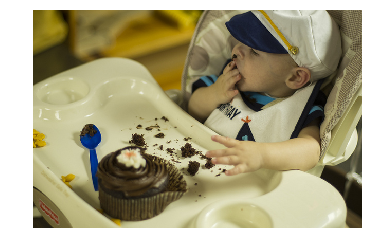

A boy eating a chocolate cupcake on a high chair.
Infant in a high chair eating a chocolate frosted chocolate cupcake.
Small baby eating a cupcake on a feeding chair.
A child in a chair eating a small cup cake.
A small boy in a high chair eating a cupcake.


In [48]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)